# PH3022 - Machine Learning and Neural Computation - Assignment_04

# Q1

# Q1.a

The Auto MPG dataset is a slightly modified version of data originally from the StatLib library at Carnegie Mellon University. It contains data concerning city-cycle fuel consumption in miles per gallon (mpg), intended to be used for regression tasks to predict mpg based on other attributes. The dataset consists of 398 instances and 9 attributes (including the class attribute). Notably, the "horsepower" attribute contains 6 missing values.

Attribute Data Types:

    mpg: Continuous
    
    cylinders: Multi-valued discrete
    
    displacement: Continuous
    
    horsepower: Continuous
    
    weight: Continuous
    
    acceleration: Continuous
    
    model year: Multi-valued discrete
    
    origin: Multi-valued discrete
    
    car name: String (unique for each instance)

# Q1.b

In [23]:
import pandas as pd
import numpy as np

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, names=column_names, sep=r'\s+', na_values='?')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [24]:
df.shape

(398, 9)

# Q1.c

In [25]:
df_new = df.drop('car_name', axis=1)
df_new.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [26]:
df_new.shape

(398, 8)

# Q1.d

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [32]:
mean_values = df_new.mean()
df_m = df_new.fillna(mean_values)
df_m.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

# Q1.e

In [49]:
std_dev = df_m.std()
max_std_dev_value = std_dev.max()
max_std_dev_col = std_dev.idxmax()

print(std_dev)
print("\n")
print(f"Column with the highest standard deviation: {max_std_col}")
print(f"Value of the highest standard deviation: {max_std_value:.4f}")

mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.199187
weight          846.841774
acceleration      2.757689
model_year        3.697627
origin            0.802055
dtype: float64


Column with the highest standard deviation: weight
Value of the highest standard deviation: 846.8418


# Q1.f

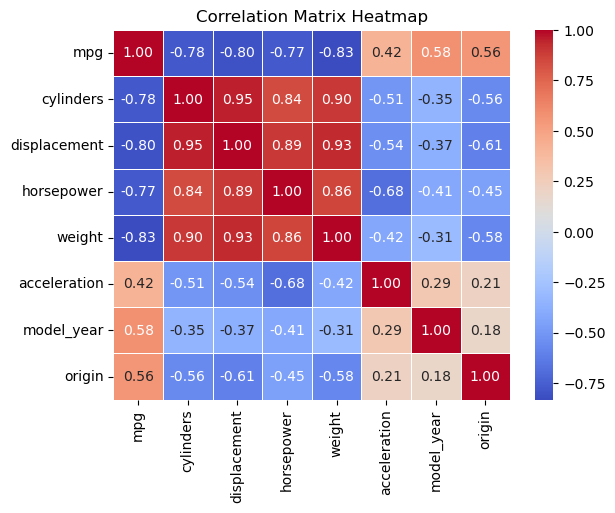

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_m.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Q1.g

In [38]:
corr_matrix = df_m.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
upper_triangle = corr_matrix.where(mask)
positive_pairs = upper_triangle.stack()
positive_pairs = positive_pairs[positive_pairs > 0]
positive_pairs_sorted = positive_pairs.sort_values(ascending=False)
print(positive_pairs_sorted)

cylinders     displacement    0.950721
displacement  weight          0.932824
cylinders     weight          0.896017
displacement  horsepower      0.893646
horsepower    weight          0.860574
cylinders     horsepower      0.838939
mpg           model_year      0.579267
              origin          0.563450
              acceleration    0.420289
acceleration  model_year      0.288137
              origin          0.205873
model_year    origin          0.180662
dtype: float64


# Q1.h

In [39]:
corr_matrix = df_m.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
upper_triangle = corr_matrix.where(mask)
negative_pairs = upper_triangle.stack()
negative_pairs = negative_pairs[negative_pairs < 0]
negative_pairs_sorted = negative_pairs.sort_values(ascending=True)
print(negative_pairs_sorted)

mpg           weight         -0.831741
              displacement   -0.804203
              cylinders      -0.775396
              horsepower     -0.771437
horsepower    acceleration   -0.684259
displacement  origin         -0.609409
weight        origin         -0.581024
cylinders     origin         -0.562543
displacement  acceleration   -0.543684
cylinders     acceleration   -0.505419
horsepower    origin         -0.453669
weight        acceleration   -0.417457
horsepower    model_year     -0.411651
displacement  model_year     -0.370164
cylinders     model_year     -0.348746
weight        model_year     -0.306564
dtype: float64


# Q1.i

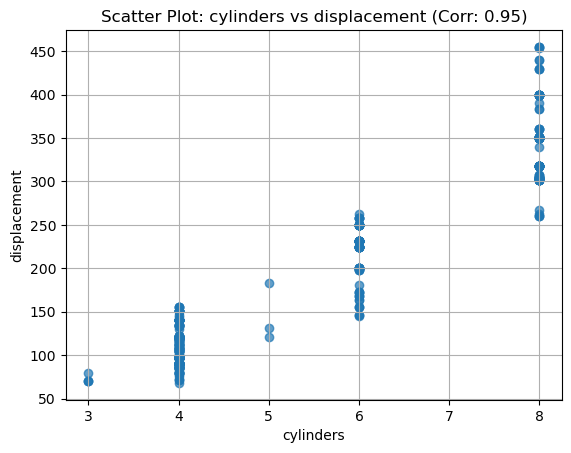

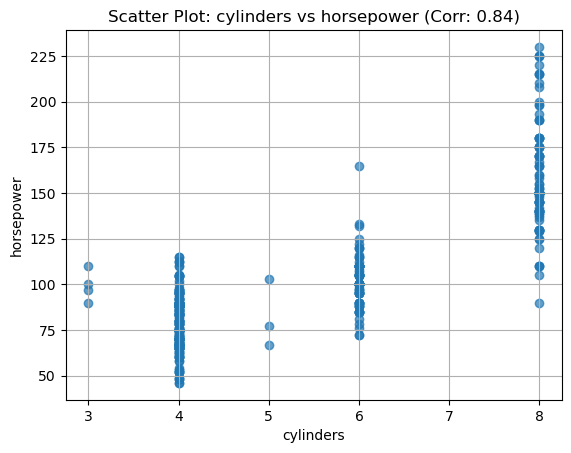

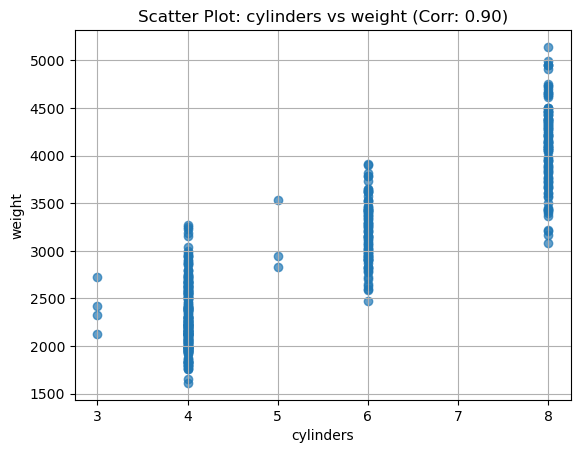

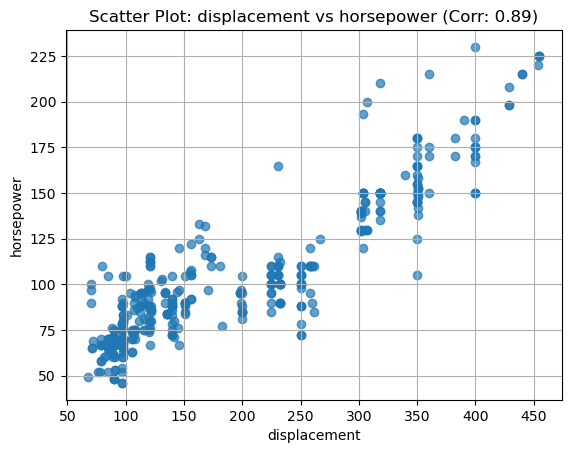

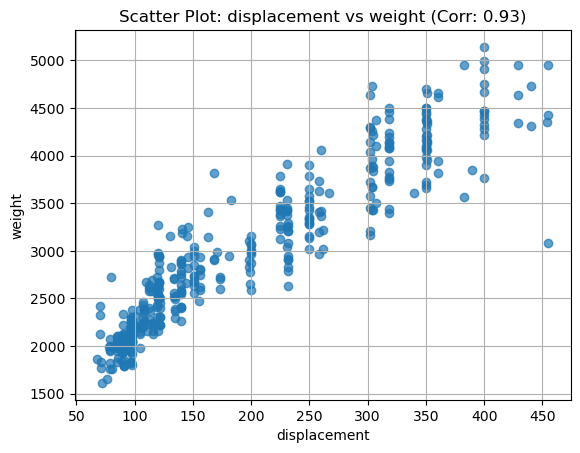

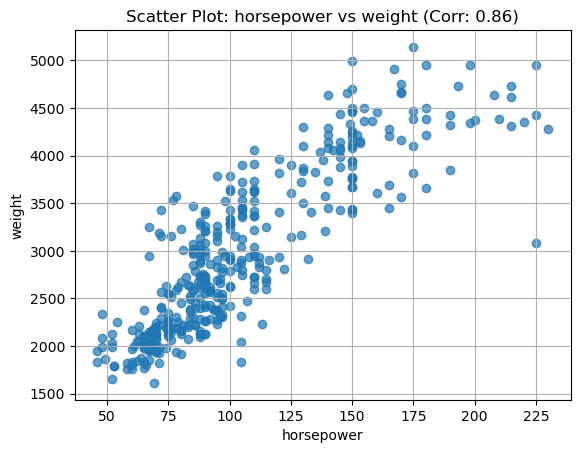

In [40]:
import matplotlib.pyplot as plt

high_corr_pairs = positive_pairs[positive_pairs > 0.8]
for (col1, col2) in high_corr_pairs.index:
    plt.scatter(df_m[col1], df_m[col2], alpha=0.7)
    plt.title(f'Scatter Plot: {col1} vs {col2} (Corr: {high_corr_pairs[(col1, col2)]:.2f})')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()

# Q1.j

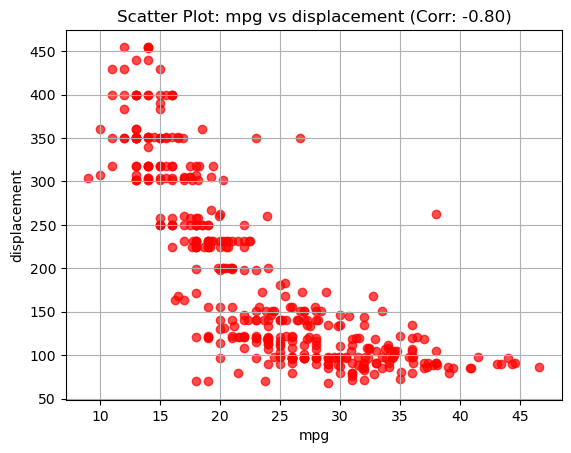

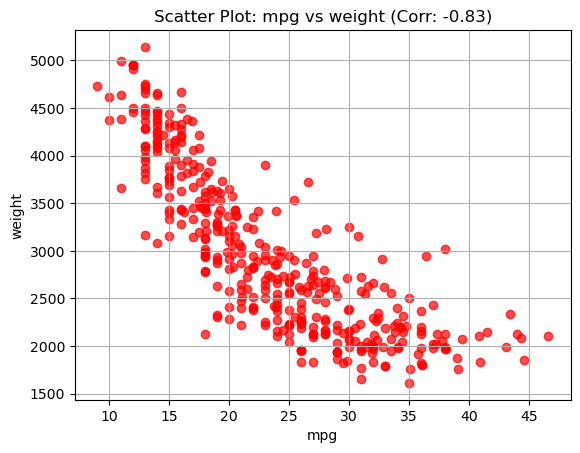

In [41]:
high_neg_pairs = negative_pairs[negative_pairs < -0.8]
for (col1, col2) in high_neg_pairs.index:
    plt.scatter(df_m[col1], df_m[col2], alpha=0.7, color='red')
    plt.title(f'Scatter Plot: {col1} vs {col2} (Corr: {high_neg_pairs[(col1, col2)]:.2f})')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()

# Q1.k

In [42]:
df_mean = df_m.mean()
df_std_dev = df_m.std()
df_std = (df_m - df_mean) / df_std_dev

print(df_std.head())

        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.705551   1.496308      1.089233    0.668355  0.630077     -1.293870   
1 -1.089379   1.496308      1.501624    1.584605  0.853259     -1.475181   
2 -0.705551   1.496308      1.194728    1.191926  0.549778     -1.656492   
3 -0.961437   1.496308      1.060461    1.191926  0.546236     -1.293870   
4 -0.833494   1.496308      1.041280    0.930141  0.565130     -1.837804   

   model_year    origin  
0   -1.625381 -0.714246  
1   -1.625381 -0.714246  
2   -1.625381 -0.714246  
3   -1.625381 -0.714246  
4   -1.625381 -0.714246  


# Q1.l

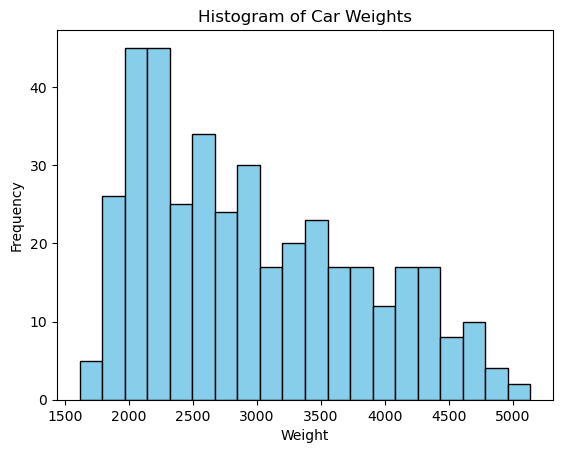

Mean:   2970.42
Median: 2803.50
Mode:   1985.00


In [43]:
import matplotlib.pyplot as plt

plt.hist(df_m['weight'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Car Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

weight_mean = df_m['weight'].mean()
weight_median = df_m['weight'].median()
weight_mode = df_m['weight'].mode()[0] 

print(f"Mean:   {weight_mean:.2f}")
print(f"Median: {weight_median:.2f}")
print(f"Mode:   {weight_mode:.2f}")

# Q2

# Q2.a

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_std.drop('mpg', axis=1)
y = df_std['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

for col, coef in zip(X.columns, linear_model.coef_):
    print(f"{col}: {coef:.4f}")
print(f"Intercept: {linear_model.intercept_:.4f}")

cylinders: -0.0336
displacement: 0.1867
horsepower: -0.0577
weight: -0.7341
acceleration: 0.0264
model_year: 0.3768
origin: 0.1348
Intercept: -0.0021


# Q2.b

In [45]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, y_train)

y_pred_en = elastic_net_model.predict(X_test)

for col, coef in zip(X.columns, elastic_net_model.coef_):
    print(f"{col}: {coef:.4f}")
print(f"Intercept: {elastic_net_model.intercept_:.4f}")

cylinders: -0.0280
displacement: -0.0339
horsepower: -0.0812
weight: -0.4936
acceleration: 0.0000
model_year: 0.3062
origin: 0.0973
Intercept: -0.0022


# Q2.c

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

grid_search = GridSearchCV(
    estimator=ElasticNet(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

y_pred_best = best_model.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.1}


# Q2.d

      Metric  Linear Regression  Tuned Elastic Net
0        MSE           0.134155           0.135774
1       RMSE           0.366271           0.368475
2  R-Squared           0.847573           0.845734


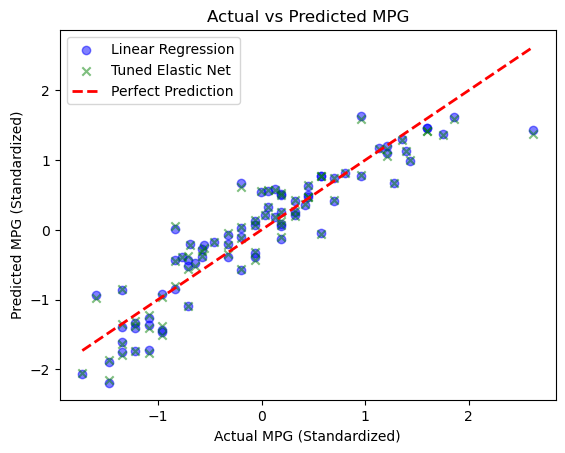

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

results_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R-Squared'],
    'Linear Regression': [mse_lr, rmse_lr, r2_lr],
    'Tuned Elastic Net': [mse_best, rmse_best, r2_best]
})
print(results_df)

plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_best, alpha=0.5, label='Tuned Elastic Net', color='green', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual MPG (Standardized)')
plt.ylabel('Predicted MPG (Standardized)')
plt.title('Actual vs Predicted MPG')
plt.legend()
plt.show()